In [70]:
from sklearn import datasets
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [71]:
work_directory = "../../combustiveis/"
dataset_name = "dataset_etanol_gasolina_gnv_guarulhos.csv"

df_original = pd.read_csv(work_directory + dataset_name, sep=",", decimal=".", encoding="cp860", index_col=False)

In [72]:
df = df_original

In [73]:
df = df[["Semestre", "Valor de Compra", "Valor de Venda", "Produto"]]

In [74]:
df = df.dropna()

In [75]:
df.head()

,Semestre,Valor de Compra,Valor de Venda,Produto
5,2020-01,3.8512,4.247,GASOLINA
6,2020-01,2.6860,2.949,ETANOL
12,2020-01,2.7692,3.199,ETANOL
13,2020-01,3.6744,4.299,GASOLINA
14,2020-01,2.6299,2.999,ETANOL


In [76]:
semestres = np.unique(df["Semestre"])

anos = np.unique([x.split("-")[0] for x in semestres])

for ano in anos:
    df = df.replace("^" + ano + ".*", str(ano), regex=True)

df = df.rename(columns={"Semestre": "Ano"})

contadores = df["Ano"].value_counts()

print(contadores)


2005    3594
2006    3548
2007    3148
2004    2332
2015    2166
2010    2070
2011    2036
2013    2019
2012    2000
2016    1996
2018    1971
2019    1962
2014    1857
2008    1808
2017    1688
2009    1446
2020     555
Name: Ano, dtype: int64


GASOLINA    18417
ETANOL      17465
GNV           314
Name: Produto, dtype: int64

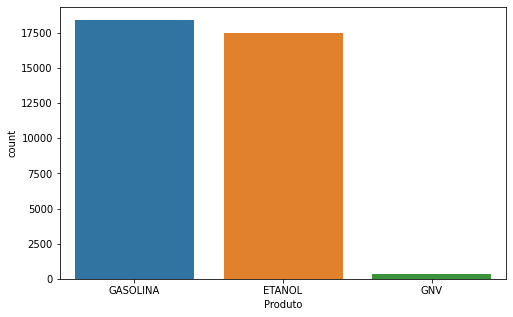

In [77]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.countplot(x="Produto", data=df, ax=ax)

df["Produto"].value_counts()

In [88]:
df_geral = pd.DataFrame()

labels = np.unique(df["Produto"])

for label in labels:
    periodo_subset = df.loc[df["Produto"] == label, :]
    sampled = periodo_subset.sample(314)
    df_geral = pd.concat([df_geral, sampled], ignore_index=True)

df = df_geral

fig, ax = plt.subplots(figsize=(20, 5))
sns.countplot(x="Produto", data=df, ax=ax)


ValueError: Cannot take a larger sample than population when 'replace=False'

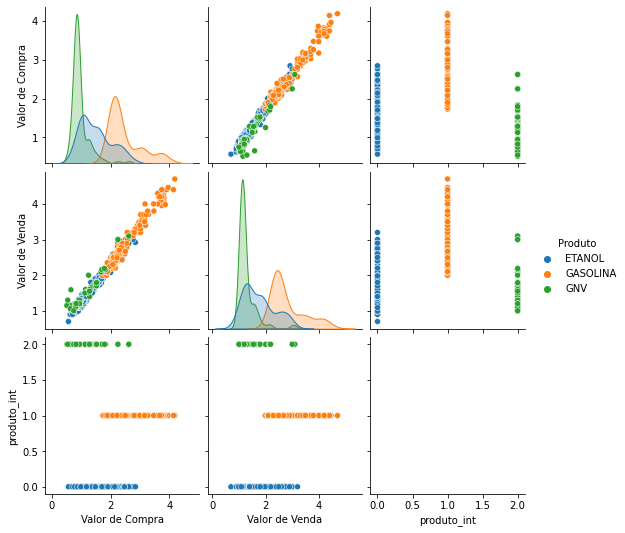

In [89]:
sns.pairplot(df, hue='Produto')

In [80]:
df['produto_int'] = pd.Categorical(df['Produto']).codes

In [81]:
df.head()

,Ano,Valor de Compra,Valor de Venda,Produto,produto_int
0,2008,1.0685,1.299,ETANOL,0
1,2011,1.6554,1.949,ETANOL,0
2,2004,0.6271,0.899,ETANOL,0
3,2012,1.6872,1.779,ETANOL,0
4,2005,0.9750,1.099,ETANOL,0


In [82]:
# Definindo valores que serão utilizados
X = df[["Valor de Compra", "Valor de Venda"]]
y = df["produto_int"]

# Separando dados de treino e de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [83]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [84]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors=2, p=2, metric='minkowski')

KNN.fit(X_train_std, y_train)

KNeighborsClassifier(n_neighbors=2)

In [85]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined_std = np.hstack((y_train, y_test))

In [86]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import matplotlib
from distutils.version import LooseVersion

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    color=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')
        
    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]
    
    if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):
        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100,
                    label='test set')
    else:
        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='none',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100,
                    label='test set')

/tmp/ipykernel_7985/1485689645.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


UnboundLocalError: local variable 'X_test' referenced before assignment

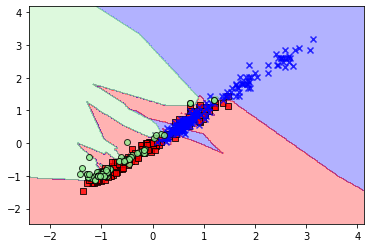

In [87]:
plot_decision_regions(X_combined_std, y_combined_std, classifier=KNN)